# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

In [ ]:
!pip install turicreate
!pip install networkx


In [ ]:
slected_tv_show_name = "TheLastAirbender"
!mkdir ./datasets
!mkdir ./datasets/TheLastAirbender

!wget -O ./datasets/TheLastAirbender/TheLastAirbender.tar.gz http://dynamics.cs.washington.edu/nobackup/reddit/TheLastAirbender.tar.gz

mkdir: cannot create directory ‘./datasets’: File exists
--2021-11-16 17:28:10--  http://dynamics.cs.washington.edu/nobackup/reddit/TheLastAirbender.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 377905456 (360M) [application/x-gzip]
Saving to: ‘./datasets/TheLastAirbender/TheLastAirbender.tar.gz’

./datasets/TheLastA 100%[===================>] 360.40M  45.7MB/s    in 8.4s    

2021-11-16 17:28:18 (43.0 MB/s) - ‘./datasets/TheLastAirbender/TheLastAirbender.tar.gz’ saved [377905456/377905456]



In [ ]:
# importing the "tarfile" module
import tarfile
  
# open file
file = tarfile.open('./datasets/TheLastAirbender/TheLastAirbender.tar.gz')
  
# extracting file
file.extractall('./datasets/TheLastAirbender/')
  
file.close()

In [ ]:
import turicreate as tc 

sg = tc.load_sgraph("/content/datasets/TheLastAirbender/TheLastAirbender.2010-07-22.2016-10-31.sgraph")
sg

SGraph({'num_edges': 666579, 'num_vertices': 84139})
Vertex Fields:['__id', 'mindate', 'maxdate']
Edge Fields:['__src_id', '__dst_id', 'maxdate', 'weight', 'mindate']

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [ ]:
degree = tc.degree_counting.create(sg)
degree['graph']
sg.vertices['total_degree'] = degree['graph'].vertices['total_degree']
sg.vertices['in_degree'] = degree['graph'].vertices['in_degree']
sg.vertices['out_degree'] = degree['graph'].vertices['out_degree']
sg.vertices.sort("total_degree", ascending=False)

Columns:
	__id	str
	mindate	datetime
	maxdate	datetime
	total_degree	int
	in_degree	int
	out_degree	int

Rows: 84139

Data:
+----------------+---------------------+---------------------+--------------+
|      __id      |       mindate       |       maxdate       | total_degree |
+----------------+---------------------+---------------------+--------------+
|    Slyfox00    | 2012-05-22 02:54:27 | 2016-10-30 05:09:11 |     4257     |
| AnOnlineHandle | 2012-05-03 05:16:26 | 2016-10-28 01:00:46 |     3355     |
|   SNCommand    | 2013-05-11 22:31:05 | 2016-05-10 12:40:28 |     3169     |
|   artacuno53   | 2012-04-19 01:42:24 | 2016-03-22 13:21:39 |     3040     |
|   Turnshroud   | 2012-04-07 16:03:04 | 2016-03-30 20:53:31 |     2645     |
|     Lppt87     | 2014-08-31 03:32:47 | 2016-08-12 22:15:23 |     2438     |
|    KrabbHD     | 2013-11-19 21:52:13 | 2016-10-01 19:39:07 |     2433     |
|  danielr1341   | 2012-09-26 22:59:43 | 2016-04-18 12:07:12 |     2431     |
|     Eldi13     | 2012-03-15 06:18:48 | 2016-10-28 11:42:55 |     2375     |
|   LadySpace    | 2012-03-15 18:11:59 | 2013-10-22 14:59:15 |     2221     |
+----------------+---------------------+---------------------+--------------+
+-----------+------------+
| in_degree | out_degree |
+-----------+------------+
|    2260   |    1997    |
|    1565   |    1790    |
|    1971   |    1198    |
|    1623   |    1417    |
|    1206   |    1439    |
|    1197   |    1241    |
|    1087   |    1346    |
|    1378   |    1053    |
|    1159   |    1216    |
|    1392   |    829     |
+-----------+------------+
[84139 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

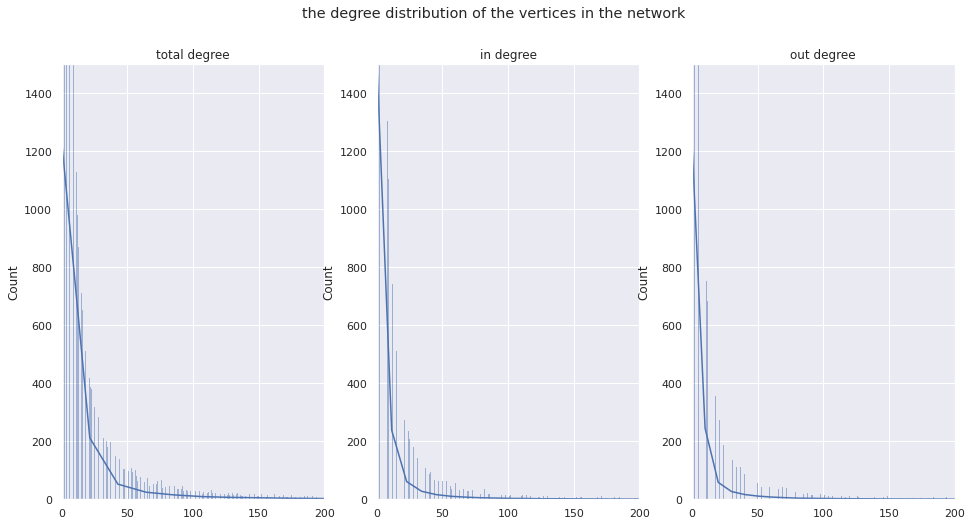

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

fig, axes = plt.subplots(1,3, figsize=(16,8))

fig.suptitle('the degree distribution of the vertices in the network')

axes[0].set_title('total degree')
axes[0].set(ylim=(0, 1500), xlim=(0,200))
sns.histplot(ax=axes[0], x=sg.vertices['total_degree'], kde=True, )

axes[1].set_title('in degree')
axes[1].set(ylim=(0, 1500), xlim=(0,200))
sns.histplot(ax=axes[1], x=sg.vertices['in_degree'], kde=True)

axes[2].set_title('out degree')
axes[2].set(ylim=(0,1500), xlim=(0,200))
sns.histplot(ax=axes[2], x=sg.vertices['out_degree'], kde=True)

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [ ]:
# Calculating Pagerank
pr = tc.pagerank.create(sg)
sg.vertices['pagerank'] = pr['graph'].vertices['pagerank']
sg.vertices.sort("pagerank", ascending=False)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 84600                 |

| 2         | 17340.8               |

| 3         | 4303.3                |

| 4         | 1427.86               |

| 5         | 678.855               |

| 6         | 480.375               |

| 7         | 385.419               |

| 8         | 315.239               |

| 9         | 260.311               |

| 10        | 215.602               |

| 11        | 179.048               |

| 12        | 148.857               |

| 13        | 123.871               |

| 14        | 103.166               |

| 15        | 85.9404               |

| 16        | 71.6223               |

| 17        | 59.6921               |

| 18        | 49.7598               |

| 19        | 41.4826               |

| 20        | 34.5862               |

+-----------+-----------------------+

Columns:
	__id	str
	mindate	datetime
	maxdate	datetime
	total_degree	int
	in_degree	int
	out_degree	int
	pagerank	float

Rows: 84139

Data:
+------------------+---------------------+---------------------+--------------+
|       __id       |       mindate       |       maxdate       | total_degree |
+------------------+---------------------+---------------------+--------------+
|     Slyfox00     | 2012-05-22 02:54:27 | 2016-10-30 05:09:11 |     4257     |
|    SNCommand     | 2013-05-11 22:31:05 | 2016-05-10 12:40:28 |     3169     |
|    artacuno53    | 2012-04-19 01:42:24 | 2016-03-22 13:21:39 |     3040     |
|  AnOnlineHandle  | 2012-05-03 05:16:26 | 2016-10-28 01:00:46 |     3355     |
|   danielr1341    | 2012-09-26 22:59:43 | 2016-04-18 12:07:12 |     2431     |
|    LadySpace     | 2012-03-15 18:11:59 | 2013-10-22 14:59:15 |     2221     |
|   TallestSkil    | 2011-07-21 18:45:49 | 2014-01-02 20:47:20 |     1916     |
|    tiger66261    | 2013-11-03 17:57:04 | 2016-05-18 12:58:05 |     2057     |
| MulciberTenebras | 2013-06-22 13:14:20 | 2016-10-20 21:43:56 |     1971     |
|      Lppt87      | 2014-08-31 03:32:47 | 2016-08-12 22:15:23 |     2438     |
+------------------+---------------------+---------------------+--------------+
+-----------+------------+--------------------+
| in_degree | out_degree |      pagerank      |
+-----------+------------+--------------------+
|    2260   |    1997    | 157.44993445851526 |
|    1971   |    1198    | 145.2911017570728  |
|    1623   |    1417    | 122.05837473799328 |
|    1565   |    1790    | 107.80888320678481 |
|    1378   |    1053    | 107.05990110117742 |
|    1392   |    829     | 100.46821134137915 |
|    1216   |    700     | 99.76890338640622  |
|    1314   |    743     | 99.66909130335677  |
|    1206   |    765     | 92.71617249405222  |
|    1197   |    1241    |  87.6652476357398  |
+-----------+------------+--------------------+
[84139 rows x 7 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
# Selecting the top 40 most central vertices based on pagerank
n=40
top_n_pagerank_ids = sg.vertices.sort("pagerank", ascending=False)[:n]["__id"]
# Creating a subgraph of these vertices
top_sg = sg.get_neighborhood(ids=top_n_pagerank_ids, radius=0, full_subgraph=True)
top_sg

SGraph({'num_edges': 1001, 'num_vertices': 40})
Vertex Fields:['__id', 'mindate', 'maxdate', 'total_degree', 'in_degree', 'out_degree', 'pagerank']
Edge Fields:['__src_id', '__dst_id', 'maxdate', 'mindate', 'weight']

In [ ]:
import networkx as nx

def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g


top_ng = sgraph2nxgraph(top_sg)
print("Networkx: %s" % nx.info(top_ng))

Networkx: DiGraph with 40 nodes and 1001 edges


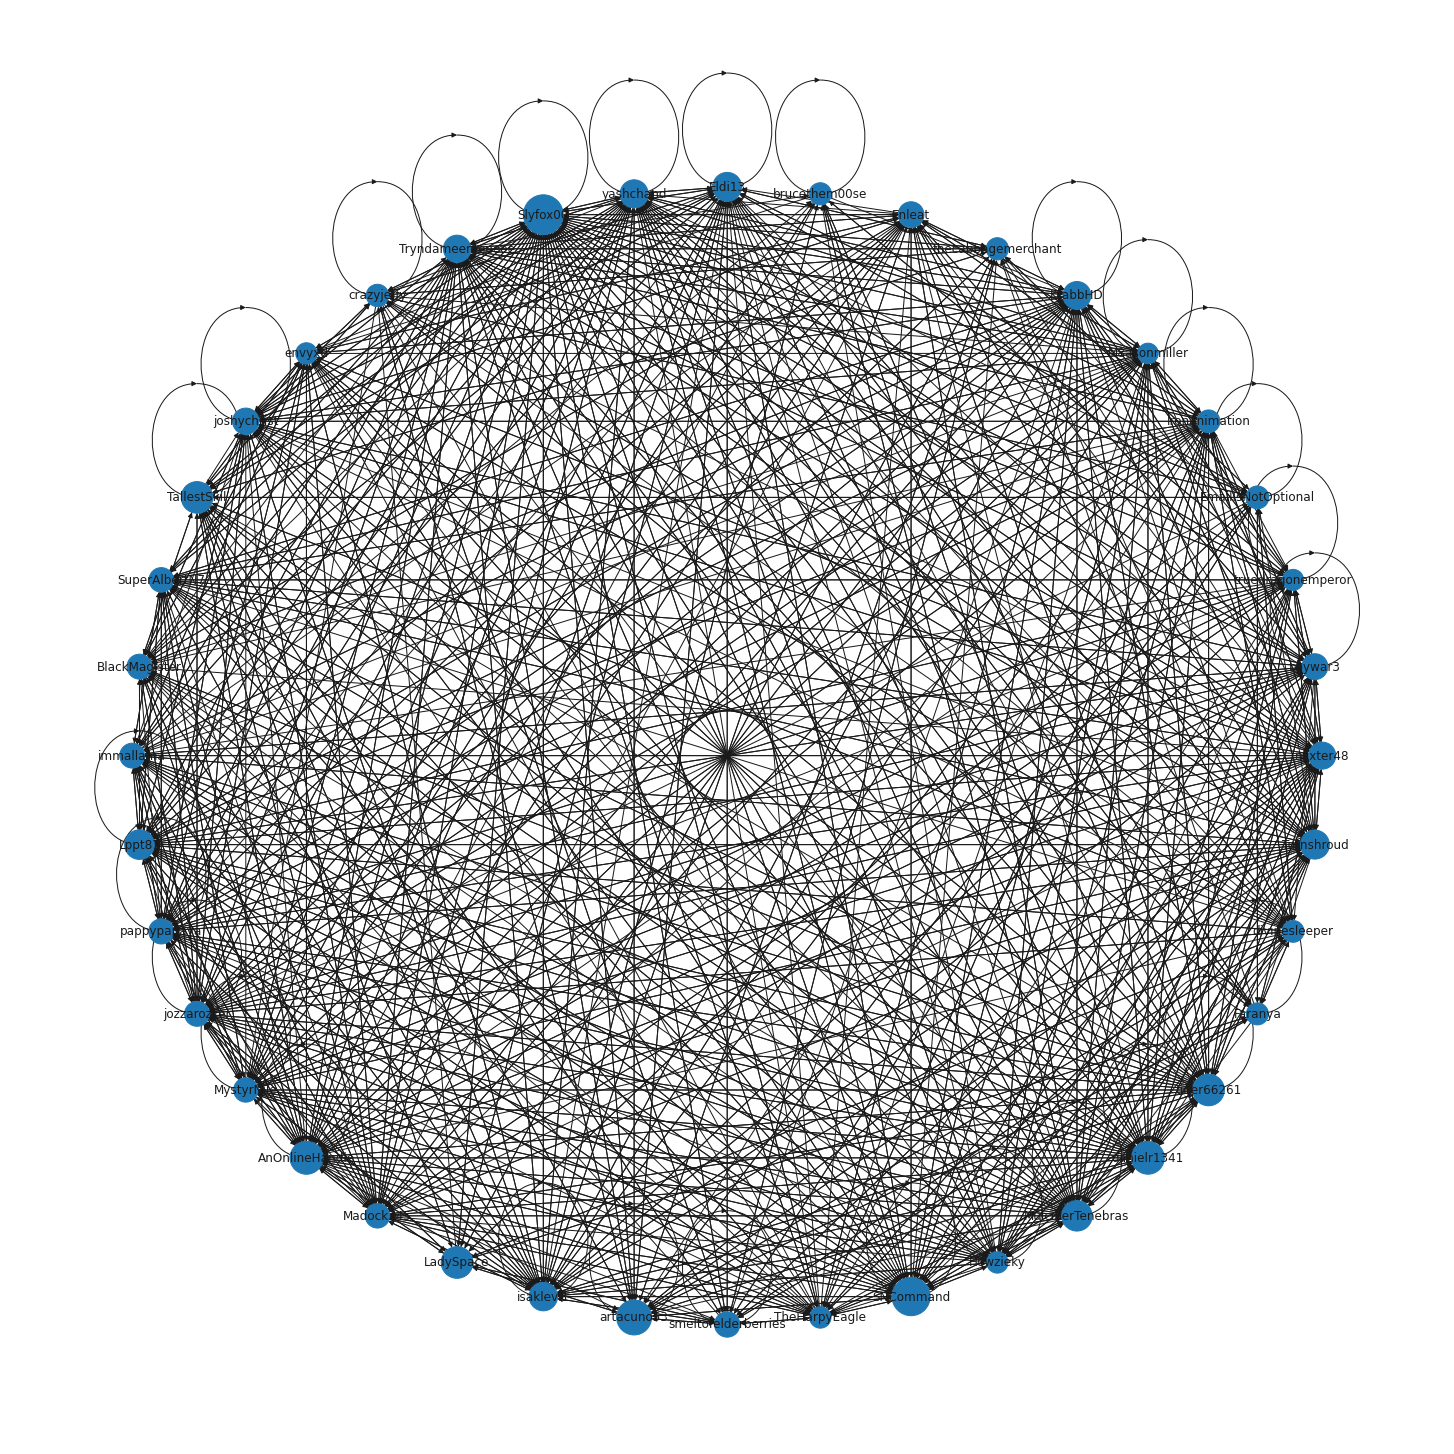

In [ ]:
plt.figure(figsize=(20,20))
sizes = [node[1]["pagerank"]*10 for node in top_ng.nodes(data=True)]
nx.draw_circular(top_ng, with_labels=True, node_size=sizes)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [ ]:
import numpy as np
# PageRank already calculated
triangles = tc.triangle_counting.create(top_sg)
top_sg.vertices['triangles'] = triangles['graph'].vertices['triangle_count']

average_shortest_paths = []
for vertex_id in top_sg.vertices["__id"]:
  sp = tc.shortest_path.create(top_sg, source_vid=vertex_id)
  average_shortest_path = np.mean(list(sp['distance']['distance']))
  average_shortest_paths.append(average_shortest_path)

top_sg.vertices['average_shortest_path'] = average_shortest_paths
top_sg.vertices

Initializing vertex ids.

Removing duplicate (bidirectional) edges.

Counting triangles...

Finished in 0.083056 secs.

Total triangles in the graph : 4027

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 67                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 67                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 66                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 72                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 66                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 63                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 63                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 45                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 71                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 69                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 63                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 64                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 64                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 59                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 51                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 56                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 54                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 57                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 71                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 79                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 64                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 71                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 67                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 71                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 71                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 68                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 69                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 60                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 66                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 72                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 60                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 62                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 71                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 70                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 77                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 72                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 67                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 59                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 55                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 62                         |

| 1                          |

| 0                          |

+----------------------------+

Columns:
	__id	str
	mindate	datetime
	maxdate	datetime
	total_degree	int
	in_degree	int
	out_degree	int
	pagerank	float
	triangles	int
	average_shortest_path	float

Rows: 40

Data:
+--------------------+---------------------+---------------------+--------------+
|        __id        |       mindate       |       maxdate       | total_degree |
+--------------------+---------------------+---------------------+--------------+
|      naxter48      | 2012-06-16 17:41:38 | 2016-10-31 18:58:00 |     1682     |
|      boywar3       | 2014-08-08 12:48:12 | 2016-06-12 20:28:31 |     2024     |
| truedragonemperor  | 2014-10-02 02:52:52 | 2016-10-30 15:27:34 |     1142     |
| EmailIsNotOptional | 2012-05-16 13:55:23 | 2013-06-22 06:09:53 |     1272     |
|   Ironanimation    | 2013-04-05 19:02:39 | 2015-07-01 22:12:30 |     2043     |
|    M8asonmiller    | 2014-03-30 07:01:07 | 2016-10-21 07:55:09 |     1249     |
|      KrabbHD       | 2013-11-19 21:52:13 | 2016-10-01 19:39:07 |     2433     |
| thecabbagemerchant | 2010-07-22 00:48:40 | 2014-12-23 02:27:35 |     804      |
|       Enleat       | 2014-05-01 10:52:03 | 2015-07-10 19:08:43 |     1957     |
|   brucethem00se    | 2015-08-16 05:48:57 | 2016-10-23 19:06:34 |     1003     |
+--------------------+---------------------+---------------------+--------------+
+-----------+------------+--------------------+-----------+-----------------------+
| in_degree | out_degree |      pagerank      | triangles | average_shortest_path |
+-----------+------------+--------------------+-----------+-----------------------+
|    1055   |    627     | 72.89036285188419  |    423    |         1.175         |
|    891    |    1133    | 66.79117010911328  |    309    |          1.3          |
|    611    |    531     | 43.92819136895895  |    289    |          1.35         |
|    744    |    528     | 52.280838378528195 |     74    |          1.7          |
|    807    |    1236    | 51.50346015458204  |    355    |         1.225         |
|    587    |    662     | 42.03678288898149  |    363    |          1.25         |
|    1087   |    1346    | 77.48902639945742  |    391    |         1.225         |
|    627    |    177     | 49.278231712443954 |     75    |         1.675         |
|    992    |    965     | 66.45003780957927  |    320    |          1.35         |
|    547    |    456     | 49.002719978558005 |     75    |         1.775         |
+-----------+------------+--------------------+-----------+-----------------------+
[40 rows x 9 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [ ]:
top_ng_node_str = {}
for node in top_ng.nodes(data=True):
  dictionary = {}
  
  # node[1]["mindate"] = node[1]["mindate"].strftime("%m/%d/%Y %H:%M:%S")
  # node[1]["maxdate"] = node[1]["maxdate"].strftime("%m/%d/%Y %H:%M:%S")  
  top_ng_node_str[node[0]] = {"mindate": node[1]["mindate"].strftime("%m/%d/%Y %H:%M:%S"), "maxdate": node[1]["maxdate"].strftime("%m/%d/%Y %H:%M:%S")}
  # maxdates_str[node[0]] = node[1]["maxdate"].strftime("%m/%d/%Y %H:%M:%S")
nx.set_node_attributes(top_ng, top_ng_node_str)

top_ng_edge_str = {}
for edge in top_ng.edges(data=True):
  dictionary = {}
  top_ng_edge_str[(edge[0],edge[1])] = {"mindate": edge[2]["mindate"].strftime("%m/%d/%Y %H:%M:%S"), "maxdate": edge[2]["maxdate"].strftime("%m/%d/%Y %H:%M:%S")}
nx.set_edge_attributes(top_ng, top_ng_edge_str)

In [ ]:
# nx.set_node_attributes(G, {1: {"attr2": 3}})
top_ng.nodes(data=True)

NodeDataView({'naxter48': {'__id': 'naxter48', 'mindate': '06/16/2012 17:41:38', 'maxdate': '10/31/2016 18:58:00', 'total_degree': 1682, 'in_degree': 1055, 'out_degree': 627, 'pagerank': 72.89036285188419}, 'boywar3': {'__id': 'boywar3', 'mindate': '08/08/2014 12:48:12', 'maxdate': '06/12/2016 20:28:31', 'total_degree': 2024, 'in_degree': 891, 'out_degree': 1133, 'pagerank': 66.79117010911328}, 'truedragonemperor': {'__id': 'truedragonemperor', 'mindate': '10/02/2014 02:52:52', 'maxdate': '10/30/2016 15:27:34', 'total_degree': 1142, 'in_degree': 611, 'out_degree': 531, 'pagerank': 43.92819136895895}, 'EmailIsNotOptional': {'__id': 'EmailIsNotOptional', 'mindate': '05/16/2012 13:55:23', 'maxdate': '06/22/2013 06:09:53', 'total_degree': 1272, 'in_degree': 744, 'out_degree': 528, 'pagerank': 52.280838378528195}, 'Ironanimation': {'__id': 'Ironanimation', 'mindate': '04/05/2013 19:02:39', 'maxdate': '07/01/2015 22:12:30', 'total_degree': 2043, 'in_degree': 807, 'out_degree': 1236, 'pageran

In [ ]:
for node in top_ng.nodes(data=True):
  del node[1]['__id']
for edge in top_ng.edges(data=True): 
  del edge[2]['__src_id']
  del edge[2]['__dst_id']

In [ ]:
nx.write_gexf(top_ng, "./datasets/TheLastAirbender/top_ng.gexf")
nx.write_gml(top_ng, "./datasets/TheLastAirbender/top_ng.gml")

Cytoscape graph

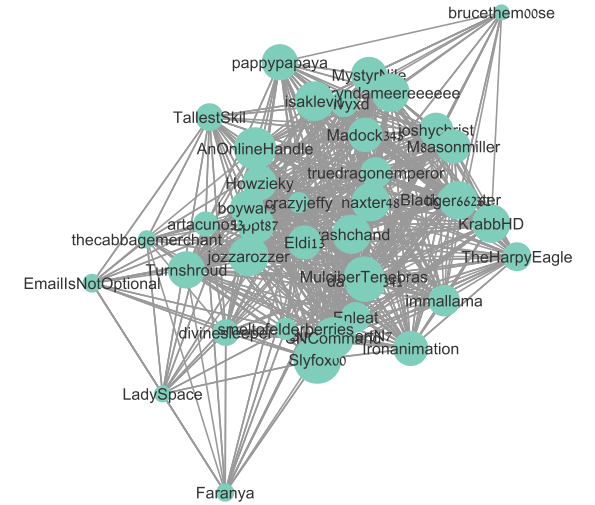

gephi graph

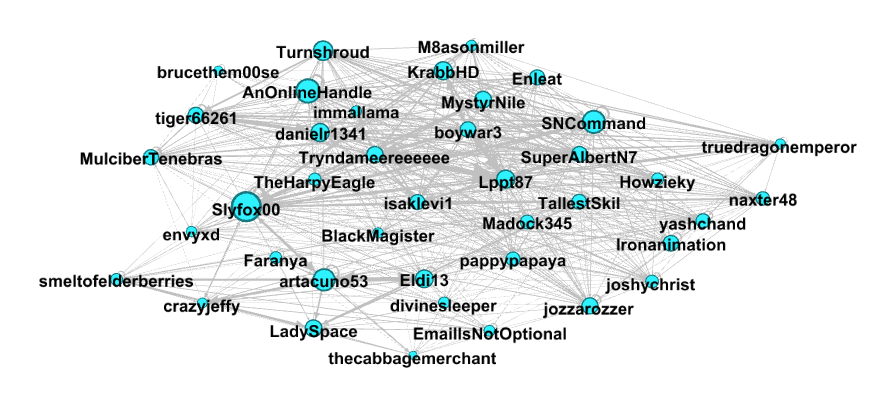

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

In [ ]:
def get_neighborhood_subgraph(graph, vertex_id, rad=1):
  neighborhood_sg = graph.get_neighborhood(ids=[vertex_id], radius=rad, full_subgraph=True)
  return neighborhood_sg

nb_sg_a = get_neighborhood_subgraph(sg,"McMew")
print("the number of verticies and edges in the subgraph:")
print(nb_sg_a)

the number of verticies and edges in the subgraph:
SGraph({'num_edges': 2277, 'num_vertices': 261})


Networkx: DiGraph with 261 nodes and 2277 edges


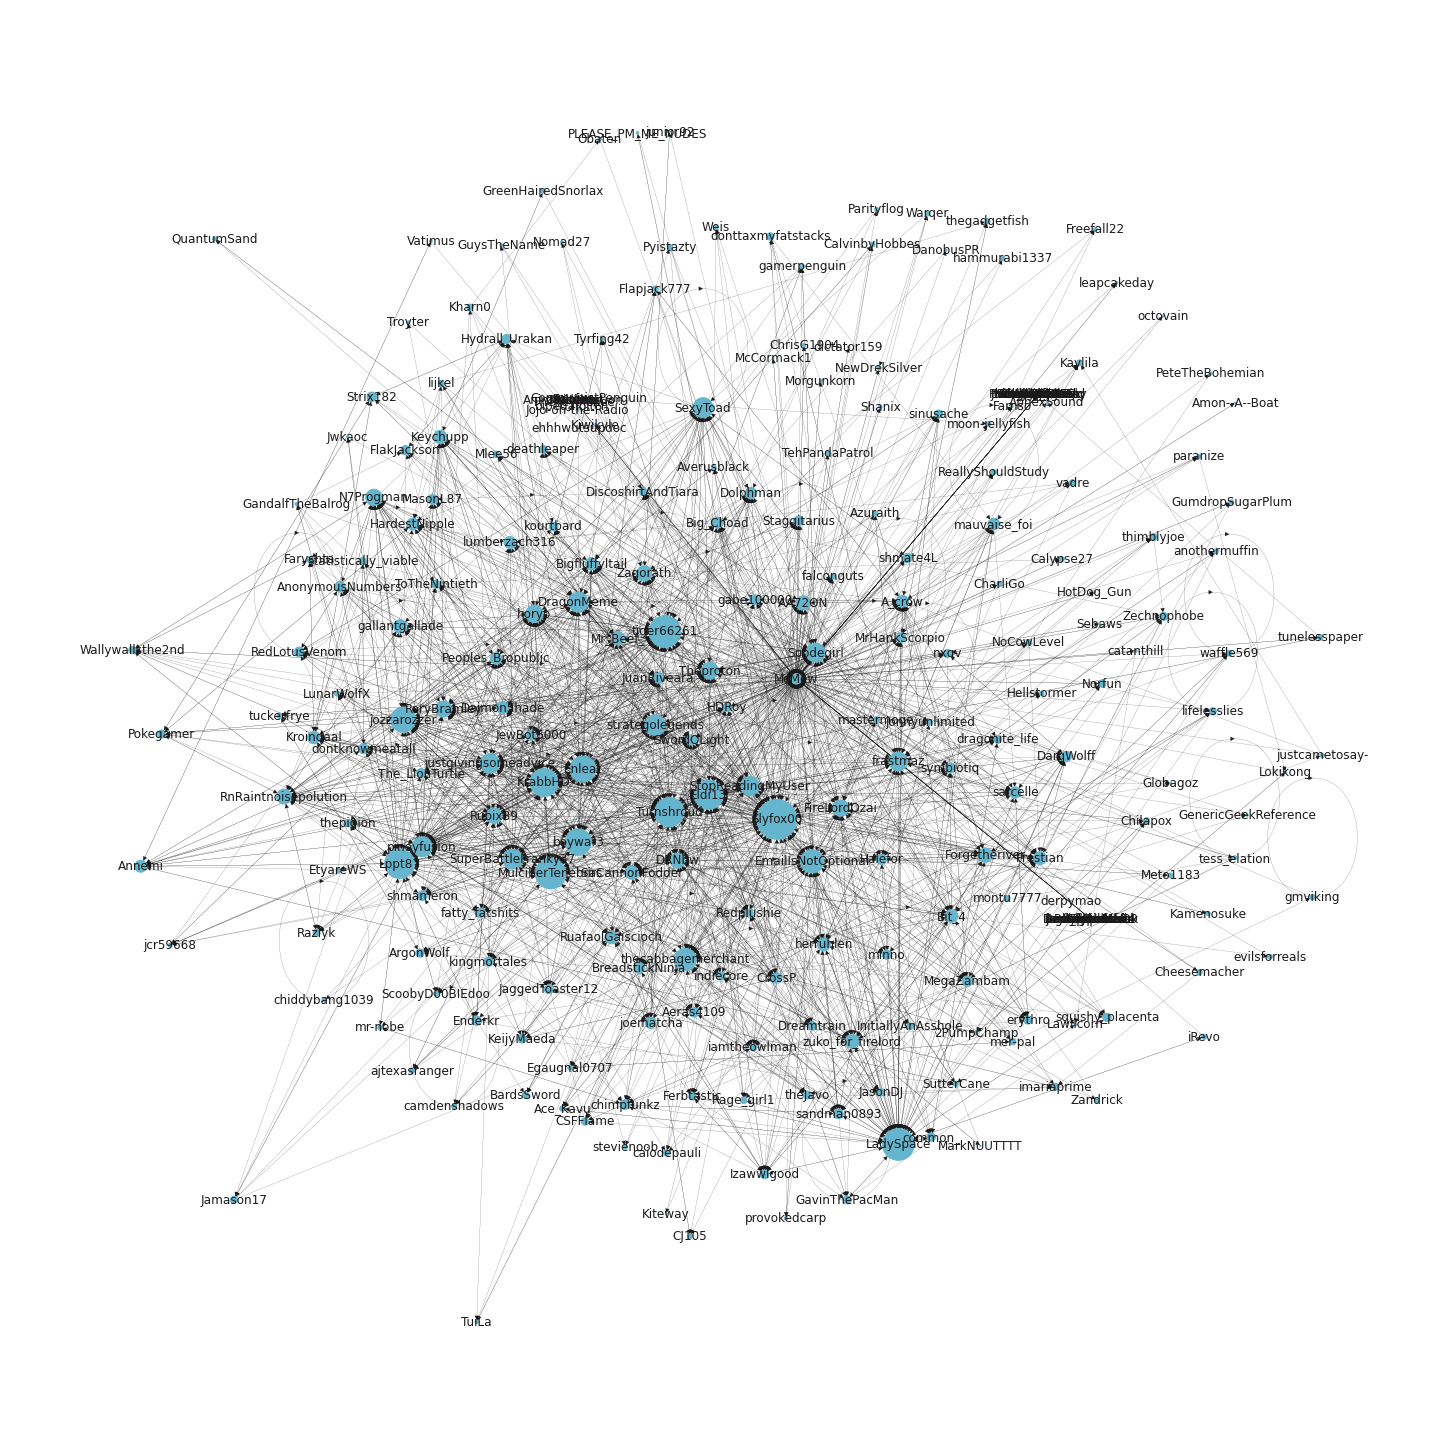

In [ ]:
nb_ng_a = sgraph2nxgraph(nb_sg_a)
print("Networkx: %s" % nx.info(nb_ng_a))
plt.figure(figsize=(20,20))
sizes = [node[1]["pagerank"]*10 for node in nb_ng_a.nodes(data=True)]
node_colors = ["c" for node in nb_ng_a.nodes()]
nx.draw_kamada_kawai(nb_ng_a, with_labels=True, node_size=sizes, node_color=node_colors, width=0.15)

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/chess
!wget -O ./datasets/chess/fcis.tar.gz http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/chess’: File exists
--2021-11-16 17:30:19--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/chess/fcis.tar.gz’

./datasets/chess/fc 100%[===================>]   6.38G  42.2MB/s    in 5m 2s   

2021-11-16 17:35:21 (21.7 MB/s) - ‘./datasets/chess/fcis.tar.gz’ saved [6852261483/6852261483]



In [ ]:
import tarfile
file = tarfile.open('./datasets/chess/fcis.tar.gz')
file.extractall('./datasets/chess/')
file.close()

In [ ]:
import turicreate as tc 

v_fcis_sf = tc.SFrame.read_csv("/content/datasets/chess/FCIS/fcis_chess.vertices.csv", nrows=10000)

# v_fcis_sf = tc.load_sframe("/content/datasets/chess/FCIS/fcis_chess.vertices.sframe")
fcis_sg_ids = v_fcis_sf[:]["v_id"]
# v_fcis_sf = v_fcis_sf[v_fcis_sf.apply(lambda r: r['v_id'] in fcis_sg_ids)]
v_fcis_sf.materialize()
v_fcis_sf
# fcis_sg = fcis_sg.get_neighborhood(ids=fcis_sg_ids, radius=0, full_subgraph=True)


Finished parsing file /content/datasets/chess/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 100 lines in 1.93075 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/chess/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 10000 lines in 0.582152 secs.

Columns:
	mindate	str
	v_id	str
	maxdate	str

Rows: 10000

Data:
+-----------------+----------+-----------------+
|     mindate     |   v_id   |     maxdate     |
+-----------------+----------+-----------------+
| 19990101T031300 |  ranger  | 20140729T013000 |
| 19990101T031300 |   game   | 19991230T235800 |
| 19990101T125100 |  abpdoc  | 20131105T025300 |
| 19990101T125100 | jovanka  | 20050513T195000 |
| 19990102T071500 | HugoPrat | 20010625T081800 |
| 19990102T071500 |   Pepo   | 20141222T171500 |
| 19990102T204500 |   Alby   | 20151218T190800 |
| 19990102T204500 |   Zaza   | 20031105T064000 |
| 19990103T084600 |  chirpy  | 20150705T023500 |
| 19990103T084600 |   varg   | 20140613T222000 |
+-----------------+----------+-----------------+
[10000 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
l_fcis_sf = tc.SFrame.read_csv("/content/datasets/chess/FCIS/fcis_chess.interactions.csv", nrows=200000)

# l_fcis_sf = tc.load_sframe("/content/datasets/chess/FCIS/fcis_chess.interactions.sframe")
l_fcis_sf = l_fcis_sf[l_fcis_sf.apply(lambda r: r['src_id'] in fcis_sg_ids and r['dst_id'] in fcis_sg_ids)]
l_fcis_sf.materialize()
l_fcis_sf

Finished parsing file /content/datasets/chess/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 100 lines in 4.25335 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/chess/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 200000 lines in 1.35665 secs.

Columns:
	datetime	str
	src_id	str
	dst_id	str

Rows: 200000

Data:
+-----------------+----------+----------+
|     datetime    |  src_id  |  dst_id  |
+-----------------+----------+----------+
| 19990101T031300 |  ranger  |   game   |
| 19990101T031300 |   game   |  ranger  |
| 19990101T125100 | jovanka  |  abpdoc  |
| 19990101T125100 |  abpdoc  | jovanka  |
| 19990102T071500 |   Pepo   | HugoPrat |
| 19990102T071500 | HugoPrat |   Pepo   |
| 19990102T204500 |   Alby   |   Zaza   |
| 19990102T204500 |   Zaza   |   Alby   |
| 19990103T084600 |   varg   |  chirpy  |
| 19990103T084600 |  chirpy  |   varg   |
+-----------------+----------+----------+
[200000 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
fcis_sg = tc.SGraph(vertices=v_fcis_sf, edges=l_fcis_sf, vid_field="v_id", src_field="src_id", dst_field="dst_id")



In [ ]:
pr = tc.pagerank.create(fcis_sg)
fcis_sg.vertices['pagerank'] = pr['graph'].vertices['pagerank']

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 8131.2                |

| 2         | 1702.65               |

| 3         | 689.6                 |

| 4         | 379.672               |

| 5         | 230.922               |

| 6         | 149.34                |

| 7         | 101.932               |

| 8         | 71.1929               |

| 9         | 50.8575               |

| 10        | 36.7298               |

| 11        | 26.7549               |

| 12        | 19.674                |

| 13        | 14.486                |

| 14        | 10.7761               |

| 15        | 7.9995                |

| 16        | 6.00638               |

| 17        | 4.49254               |

| 18        | 3.39959               |

| 19        | 2.56305               |

| 20        | 1.95332               |

+-----------+-----------------------+

Networkx: DiGraph with 10 nodes and 8 edges


In [ ]:
# Selecting the top 40 most central vertices based on pagerank
n=40
top_n_ids = fcis_sg.vertices.sort("pagerank", ascending=False)[:n]["__id"]
top_fcis_sg = fcis_sg.get_neighborhood(ids=top_n_ids, radius=0, full_subgraph=True)
top_fcis_ng = sgraph2nxgraph(top_fcis_sg)
print("Networkx: %s" % nx.info(top_fcis_ng))

Networkx: DiGraph with 40 nodes and 136 edges


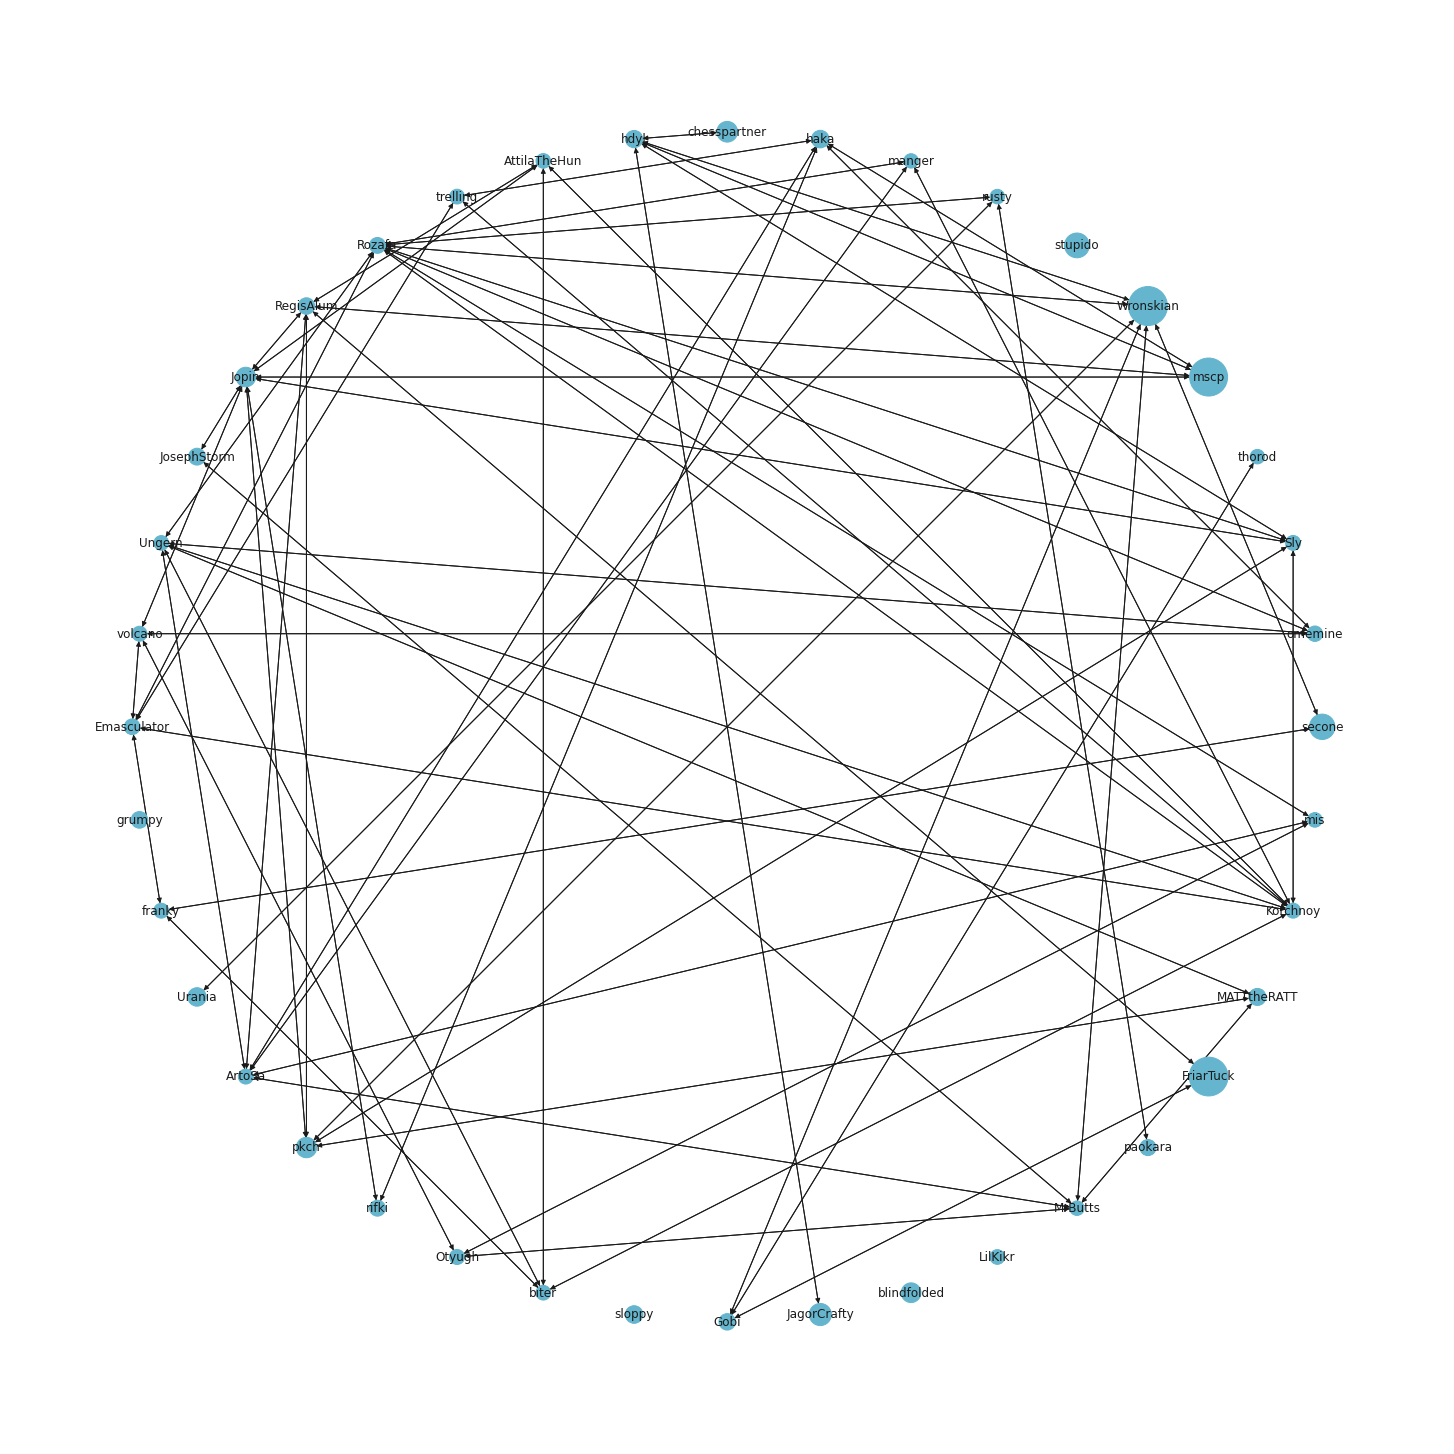

In [ ]:
plt.figure(figsize=(20,20))
sizes = [node[1]["pagerank"]*30 for node in top_fcis_ng.nodes(data=True)]
node_colors = ["c" for node in top_fcis_ng.nodes()]
nx.draw_circular(top_fcis_ng, with_labels=True, node_size=sizes, node_color=node_colors)

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [ ]:
import json
import pandas as pd

!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

#!!!fill your api key!!!
api_token = {"username":"","key":""}
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

!mkdir ./datasets/ltor

!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
mkdir: cannot create directory ‘./datasets/ltor’: File exists
lord-of-the-rings-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
replace ./datasets/ltor/lotr_characters.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: ./datasets/ltor/lotr_characters.csv  
replace ./datasets/ltor/lotr_scripts.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./datasets/ltor/lotr_scripts.csv  
lord-of-the-rings-data.zip  lotr_characters.csv  lotr_scripts.csv


In [ ]:
import re

def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
    
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]
links_df2

name_x race_x gender_x        name_y race_y gender_y
0               Adanel    Men   Female       Belemir    Men     Male
1               Angrod  Elves     Male      Eldalótë  Elves   Female
2          Ar-Pharazôn    Men     Male    Tar-Míriel    Men   Female
3          Ar-Gimilzôr    Men     Male     Inzilbêth    Men   Female
4    Tarannon Falastur    Men     Male     Berúthiel    Men   Female
..                 ...    ...      ...           ...    ...      ...
122             Amroth  Elves     Male      Nimrodel  Elves   Female
123             Amarië  Elves   Female        Finrod  Elves     Male
124            Ailinel    Men   Female     Orchaldor    Men     Male
125           Almarian    Men   Female  Tar-Meneldur    Men     Male
126             Aegnor  Elves     Male       Andreth    Men   Female

[127 rows x 6 columns]

In [ ]:
ltor_g = nx.Graph()

for i, r in links_df2.iterrows():
    ltor_g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    ltor_g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

ltor_g.add_edges_from(edges_list)
nx.write_gml(ltor_g, "./datasets/ltor/ltor_g.gml")

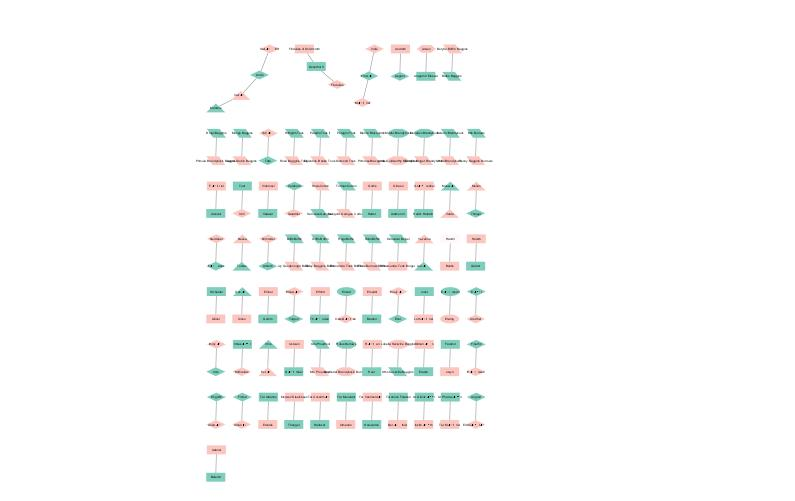

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges